# Import Modules

In [ ]:
import PIL
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os


# Load Data

In [ ]:
# set up download stuff - safe to run as many times as you want
def kaggle_setup():
  """Sets up the shell environment in order to download the kaggle datasets.
  Do not edit or remove the API credentials unless you set up your own account and want to try that for whatever reason.
  """

  !mkdir ~/.kaggle #create the .kaggle folder in your root directory
  !echo '{"username":"kevinhu2290","key":"3e574637d0eba900228844021e1b33d6"}' > ~/.kaggle/kaggle.json #write kaggle API credentials to kaggle.json
  !chmod 600 ~/.kaggle/kaggle.json  # set permissions
  !pip install kaggle #install the kaggle library

In [ ]:
def download_landscapes(force=0):
  """Downloads the datasets being used for this project. Use option force=1 to force a redownload, other unspecified default is force=0 which will not redownload if the datasets already exist. force option is for if your data gets screwed up in your runtime or something, for whatever reasons.
  """

  if force:
    #!kaggle datasets download --force -d hshukla/landscapes -p /content/kaggle/ # this is too big, do not use

    !kaggle datasets download --force -d theblackmamba31/landscape-image-colorization -p /content/kaggle/

  else:
    #!kaggle datasets download -d hshukla/landscapes -p /content/kaggle/ # this is too big, do not use

    !kaggle datasets download -d theblackmamba31/landscape-image-colorization -p /content/kaggle/

  return

def download_indian_food(force=0):
  """Downloads the datasets being used for this project. Use option force=1 to force a redownload, other unspecified default is force=0 which will not redownload if the datasets already exist. force option is for if your data gets screwed up in your runtime or something, for whatever reasons.
  """

  if force:
    #!kaggle datasets download --force -d hshukla/landscapes -p /content/kaggle/ # this is too big, do not use

    !kaggle datasets download --force -d iamsouravbanerjee/indian-food-images-dataset -p /content/kaggle/

  else:
    #!kaggle datasets download -d hshukla/landscapes -p /content/kaggle/ # this is too big, do not use

    !kaggle datasets download -d iamsouravbanerjee/indian-food-images-dataset -p /content/kaggle/

  return

In [ ]:
def unzip_landscapes(force=0):
  """This will unzip the downloaded zip dataset to /content/datasets_raw/. force=1 option will delete the datasets_raw folder and extract the files again. Only use this option if you messed up your data doing something and need to re-download and re-extract.
  """

  datasets_raw_path = Path("/content/datasets_raw")

  if (force):
    !rm -rf /content/datasets_raw
    !mkdir /content/datasets_raw


  if (datasets_raw_path.is_dir()==0) or (force):
    !mkdir /content/datasets_raw

    !unzip kaggle/landscape-image-colorization.zip -d datasets_raw/landscapes

  else:
    print("Datasets have already been unzipped. Please use force=1 option to delete and redo the unzipping process.")

  return

def unzip_indian_food(force=0):
  """This will unzip the downloaded zip dataset to /content/datasets_raw/. force=1 option will delete the datasets_raw folder and extract the files again. Only use this option if you messed up your data doing something and need to re-download and re-extract.
  """

  datasets_raw_path = Path("/content/datasets_raw")

  if (force):
    !rm -rf /content/datasets_raw
    !mkdir /content/datasets_raw


  if (datasets_raw_path.is_dir()==0) or (force):
    !mkdir /content/datasets_raw

    !unzip kaggle/indian-food-images-dataset.zip -d datasets_raw/indian_food

  else:
    print("Datasets have already been unzipped. Please use force=1 option to delete and redo the unzipping process.")

  return


def organize_landscapes():
  """If you need to reorganize your data after unzipping again, please make sure to delete your existing messed-up data in /content/datasets/landscapes/ by running '!rm -rf /content/datasets/landscapes/'. Then make sure you have your unzipped data in /content/datasets_raw/landscapes/ and rerun this function.
  """

  !mkdir /content/datasets/
  landscapes_path = Path("/content/datasets/landscapes/")

  if (landscapes_path.is_dir()==0):
    !mkdir /content/datasets/landscapes/
    !mkdir /content/datasets/landscapes/truth

    !mv /content/datasets_raw/landscapes/landscape\ Images/color/* /content/datasets/landscapes/truth/

  else:
    print("Landscape dataset has already been moved to landscapes/ dir.")

  return


def organize_indian_food():
  """If you need to reorganize your data after unzipping again, please make sure to delete your existing messed-up data in /content/datasets/indian_food/ by running '!rm -rf /content/datasets/indian_food/'. Then make sure you have your unzipped data in /content/datasets_raw/indian_food/ and rerun this function.
  """

  !mkdir /content/datasets/
  indian_food_path = Path("/content/datasets/indian_food/")

  if (indian_food_path.is_dir()==0):
    !mkdir /content/datasets/indian_food/
    !mkdir /content/datasets/indian_food/truth

    !mv /content/datasets_raw/indian_food/List\ of\ Indian\ Foods.txt /content/datasets/indian_food/

    data = []

    for dir in os.listdir("/content/datasets_raw/indian_food/Indian Food Images/Indian Food Images/"):
      !mv /content/datasets_raw/indian_food/Indian\ Food\ Images/Indian\ Food\ Images/{dir}/* /content/datasets/indian_food/truth/
      data.append(dir)

  else:
    print("Indian food dataset has already been moved to indian_food/ dir.")

  return


In [ ]:
def resize_img(img_arr, path):
  """ Resize image found in path (type string) to be 150x150. Images smaller than 150x150 to be deleted. Crop non-square images to be square before resizing down to 150x150.
  """

  # crop the longer dimension to be the same as the shorter one

  height = img_arr.shape[0]
  width = img_arr.shape[1]
  smaller = height if (height <= width) else width
  corner1 = int(height/2 - smaller/2)
  corner2 = int(height/2 + smaller/2)
  corner3 = int(width/2 - smaller/2)
  corner4 = int(width/2 + smaller/2)


  img_arr = img_arr[corner1:corner2, corner3:corner4, 0:3] # square, can resize down to 150x150 with no distortion

  img = PIL.Image.fromarray(img_arr)
  resized_img = img.resize((150, 150))
  resized_img.save(path)

  return

def resize_folder(path_str):

  l_images = []
  for image_name in os.listdir(path_str):
    l_images.append(image_name)

  for image_name in l_images:
    full_path = path_str + image_name
    check_size = np.array(PIL.Image.open(full_path))
    if (check_size.shape[0] < 150) or (check_size.shape[1] < 150):
      !rm -rf {full_path}
      l_images.remove(image_name)
    else:
      resize_img(check_size, full_path) # replaces image at full path with 150x150 version

  return

def rename_data(path_str):
  """3900-4000 indian foods (usually 3976), 7000-7129 (usually 7129) landscapes
  Renames all the data at the given path_str to be of the format
  0XXXX.jpb
  For indian food, XXXX ranges from 0000 to (n_foods-1) (usually 3976-1)
  i.e. [00000.jpg, 03975.jpg]
  For landscapes, XXXX ranges from 0000 to (n_landscapes-1) (usually 7129-1)
  i.e. [00000.jpg, 07128.jpg]

  path_str should be a path of type string looking like below:
  /content/datasets/indian_food/truth/
  /content/datasets/landscapes/truth/
  """

  l_og_names = []
  for og_name in os.listdir(path_str):
    l_og_names.append(og_name)


  if "00000.jpg" in l_og_names:
    print("Data in path has already been renamed to 0XXXX.jpg convention!")
    return

  i = 0
  for og_name in l_og_names:
    new_name = str(i).rjust(5, "0")
    !mv {path_str}/{og_name} {path_str}/{new_name}.jpg

    i += 1

  return

In [ ]:
kaggle_setup()
print('\n')
#download_landscapes()
download_indian_food()
print('\n')
#unzip_landscapes()
unzip_indian_food()
print('\n')
#organize_landscapes()
print('\n')
organize_indian_food()
print('\n')


mkdir: cannot create directory ‘/root/.kaggle’: File exists


Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/indian-food-images-dataset
License(s): other
indian-food-images-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


Archive:  kaggle/indian-food-images-dataset.zip
  inflating: datasets_raw/indian_food/Indian Food Images/Indian Food Images/adhirasam/02d09e872d.jpg  
  inflating: datasets_raw/indian_food/Indian Food Images/Indian Food Images/adhirasam/02f2e49039.jpg  
  inflating: datasets_raw/indian_food/Indian Food Images/Indian Food Images/adhirasam/06c639bab2.jpg  
  inflating: datasets_raw/indian_food/Indian Food Images/Indian Food Images/adhirasam/08b8f8efc1.jpg  
  inflating: datasets_raw/indian_food/Indian Food Images/Indian Food Images/adhirasam/09a37d7cc7.jpg  
  inflating: datasets_raw/indian_food/Indian Food Images/Indian Food Images/adhirasam/0cd70ffc10.jpg  
  inflating: datasets_raw/indian_food/Indian Foo

In [ ]:
resize_folder('/content/datasets/indian_food/truth/')

# need to run this twice for some dumb reason
# too lazy to debug this please just run this code block and then run the code block underneath and repeat until the block under this one says that everything is 150*150

# ONLY THEN run rename_data

In [ ]:
l_if_img_shapes = []
l_if_wrong_size = []
num_if_too_small = 0
num_if_right_size = 0

l_images = []
for image_name in os.listdir('/content/datasets/indian_food/truth/'):
  l_images.append(image_name)

for i in range(0, len(l_images)):
  #file_name = str(i).rjust(5, "0") # pads zeros to the left of iter i
  file_name = l_images[i]
  if_size_test = np.array(PIL.Image.open(f'/content/datasets/indian_food/truth/{file_name}'))

  if (if_size_test.shape[0] == 150) and (if_size_test.shape[1] == 150):
    num_if_right_size += 1
    l_if_img_shapes.append(if_size_test.shape)
  elif (if_size_test.shape[0] > 150) and (if_size_test.shape[1] > 150):
    l_if_img_shapes.append(if_size_test.shape)
    l_if_wrong_size.append(if_size_test)
    resize_img(if_size_test, f'/content/datasets/indian_food/truth/{file_name}.jpg')
    print(i)
  else:
    num_if_too_small += 1
    #print(if_size_test.shape)

arr_if_img_shapes = np.array(l_if_img_shapes)

print(f"There are {num_if_too_small} indian food images that are less than 150*150")
print(f"There are {len(l_if_wrong_size)} indian food images that are more than 150*150")
print("Number of 150x150 indian foods:", num_if_right_size)
print()
print("Smallest indian food image dims:", np.min(arr_if_img_shapes, axis=0))
print("Largest indian food image dims:", np.max(arr_if_img_shapes, axis=0))


for image in l_if_wrong_size:
  print(image.shape)

There are 0 indian food images that are less than 150*150
There are 0 indian food images that are more than 150*150
Number of 150x150 indian foods: 6578

Smallest indian food image dims: [150 150   3]
Largest indian food image dims: [150 150   3]


In [ ]:
# will take like 20 mins but is worth it
# this makes iterating through the datasets possible
rename_data("/content/datasets/indian_food/truth/")
print('\n')
#rename_data("/content/datasets/landscapes/truth/")

In [ ]:
n_foods = 0
for food in os.listdir("/content/datasets/indian_food/truth/"):
  n_foods += 1

print(n_foods, "indian foods")

6578 indian foods


In [ ]:
#dont run when there is only indian food

n_landscapes = 0
for food in os.listdir("/content/datasets/landscapes/truth/"):
  n_landscapes += 1

print(n_landscapes, "number of landscapes")


# sometimes datasets don't download completely for some reason, whatever
# for iteration purposes later, store the number of food and landscapes downloaded into global vars
# n_foods
# n_landscapes

# expected: 3900-4000 indian foods
# expected: 7000-7129 landscapes

FileNotFoundError: [Errno 2] No such file or directory: '/content/datasets/landscapes/truth/'

In [ ]:
l_indian_food_img_shapes = []
l_indian_food_wrong_size = []
num_indian_food_too_small = 0
num_indian_food_right_size = 0
for i in range(0, n_foods):
  file_name = str(i).rjust(5, "0") # pads zeros to the left of iter i
  indian_food_size_test = np.array(PIL.Image.open(f'/content/datasets/indian_food/truth/{file_name}.jpg'))

  if (indian_food_size_test.shape[0] == 150) and (indian_food_size_test.shape[1] == 150):
    num_indian_food_right_size += 1
    l_indian_food_img_shapes.append(indian_food_size_test.shape)
  elif (indian_food_size_test.shape[0] > 150) and (indian_food_size_test.shape[1] > 150):
    l_indian_food_img_shapes.append(indian_food_size_test.shape)
    l_indian_food_wrong_size.append(indian_food_size_test)
    resize_img(indian_food_size_test, f'/content/datasets/indian_food/truth/{file_name}.jpg')
    print(i)
  else:
    num_indian_food_too_small += 1
    #print(indian_food_size_test.shape)

3437
3558
3914
5505
5872
5876


In [ ]:
l_landscape_img_shapes = []
num_landscapes_too_small = 0
for i in range(0, n_landscapes):
  file_name = str(i).rjust(5, "0") # pads zeros to the left of iter i
  landscape_size_test = np.array(PIL.Image.open(f'/content/datasets/landscapes/truth/{file_name}.jpg'))

  if (landscape_size_test.shape[0] > 149) and (landscape_size_test.shape[0] > 149):
    l_landscape_img_shapes.append(landscape_size_test.shape)
  else:
    num_landscapes_too_small += 1
    #print(landscape_size_test.shape)

NameError: name 'n_landscapes' is not defined

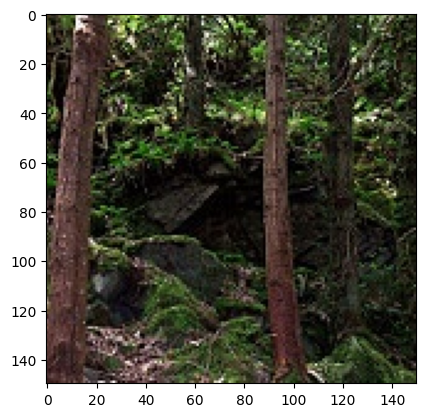

In [ ]:
landscape_test_img = np.array(PIL.Image.open('/content/datasets/landscapes/truth/00420.jpg'))
plt.imshow(landscape_test_img)

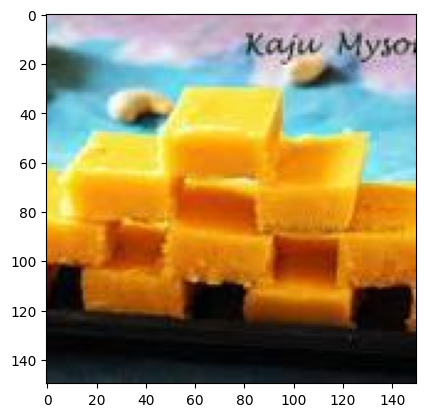

In [ ]:
indian_food_test_img = np.array(PIL.Image.open('/content/datasets/indian_food/truth/00069.jpg'))
plt.imshow(indian_food_test_img)

In [ ]:
arr_landscape_img_shapes = np.array(l_landscape_img_shapes)
print(f"There are {arr_landscape_img_shapes.shape[0]} landscape images that are at least 150*150")
print(f"There are {num_landscapes_too_small} landscape images that are less than 150*150")

print("Smallest landscape image dims:", np.min(arr_landscape_img_shapes, axis=0))
print("Largest landscape image dims:", np.max(arr_landscape_img_shapes, axis=0))

NameError: name 'l_landscape_img_shapes' is not defined

In [ ]:
arr_indian_food_img_shapes = np.array(l_indian_food_img_shapes)
print(f"There are {arr_indian_food_img_shapes.shape[0]} indian food images that are at least 150*150")
print(f"There are {num_indian_food_too_small} indian food images that are less than 150*150")

print("Smallest indian food image dims:", np.min(arr_indian_food_img_shapes, axis=0))
print("Largest indian food image dims:", np.max(arr_indian_food_img_shapes, axis=0))

print("number of 150x150 indian foods:", num_indian_food_right_size)

for image in l_indian_food_wrong_size:
  print(image.shape)

There are 6578 indian food images that are at least 150*150
There are 0 indian food images that are less than 150*150
Smallest indian food image dims: [150 150   3]
Largest indian food image dims: [1500 1300    3]
number of 150x150 indian foods: 6572
(1500, 1000, 3)
(720, 1280, 3)
(194, 259, 3)
(1300, 1300, 3)
(409, 409, 3)
(1200, 1200, 3)


# Process Data
1. Apple greyscale, sepia, and invert filters

In [ ]:
!mkdir /content/datasets/indian_food/grayscale/
!mkdir /content/datasets/indian_food/sepia/
!mkdir /content/datasets/indian_food/inverted/

mkdir: cannot create directory ‘/content/datasets/indian_food/grayscale/’: File exists
mkdir: cannot create directory ‘/content/datasets/indian_food/sepia/’: File exists
mkdir: cannot create directory ‘/content/datasets/indian_food/inverted/’: File exists


In [ ]:
!mkdir /content/datasets/landscapes/grayscale/
!mkdir /content/datasets/landscapes/sepia/
!mkdir /content/datasets/landscapes/inverted/

# file structure:
'''
content
  indian_food
    truth
      00000.jpg # (food img 00000)
      0XXXX.jpg # (food img 0XXXX)
    grayscale
      00000.jpg # greyscale version of (food img 00000)
      0XXXX.jpg # greyscale version of (food img 0XXXX)
    sepia
      00000.jpg # sepia version of (food img 00000)
      0XXXX.jpg # sepia version of (food img 0XXXX)
    invert
      00000.jpg # invert version of (food img 00000)
      0XXXX.jpg # invert version of (food img 0XXXX)
  landscapes
    truth
      00000.jpg # (landscape img 00000)
      0XXXX.jpg # (landscape img 00000)
    grayscale
      00000.jpg # greyscale version of (landscape img 00000)
      0XXXX.jpg # greyscale version of (landscape img 0XXXX)
    sepia
      00000.jpg # sepia version of (landscape img 00000)
      0XXXX.jpg # sepia version of (landscape img 0XXXX)
    invert
      00000.jpq # invert version of (landscape img 00000)
      0XXXX.jpq # invert version of (landscape img 0XXXX)
'''



mkdir: cannot create directory ‘/content/datasets/landscapes/grayscale/’: No such file or directory
mkdir: cannot create directory ‘/content/datasets/landscapes/sepia/’: No such file or directory
mkdir: cannot create directory ‘/content/datasets/landscapes/inverted/’: No such file or directory


'\ncontent\n  indian_food\n    truth\n      00000.jpg # (food img 00000)\n      0XXXX.jpg # (food img 0XXXX)\n    grayscale\n      00000.jpg # greyscale version of (food img 00000)\n      0XXXX.jpg # greyscale version of (food img 0XXXX)\n    sepia\n      00000.jpg # sepia version of (food img 00000)\n      0XXXX.jpg # sepia version of (food img 0XXXX)\n    invert\n      00000.jpg # invert version of (food img 00000)\n      0XXXX.jpg # invert version of (food img 0XXXX)\n  landscapes\n    truth\n      00000.jpg # (landscape img 00000)\n      0XXXX.jpg # (landscape img 00000)\n    grayscale\n      00000.jpg # greyscale version of (landscape img 00000)\n      0XXXX.jpg # greyscale version of (landscape img 0XXXX)\n    sepia\n      00000.jpg # sepia version of (landscape img 00000)\n      0XXXX.jpg # sepia version of (landscape img 0XXXX)\n    invert\n      00000.jpq # invert version of (landscape img 00000)\n      0XXXX.jpq # invert version of (landscape img 0XXXX)\n'

In [ ]:
from PIL import Image

# Grayscale filter
def apply_grayscale(image):
    grayscale = np.dot(image[...,:3], [0.299, 0.587, 0.114])
    return np.stack((grayscale, grayscale, grayscale), axis=-1).astype(np.uint8)

# Sepia filter
def apply_sepia(image):
    sepia = np.copy(image)
    tr = 0.393 * image[:,:,0] + 0.769 * image[:,:,1] + 0.189 * image[:,:,2]
    tg = 0.349 * image[:,:,0] + 0.686 * image[:,:,1] + 0.168 * image[:,:,2]
    tb = 0.272 * image[:,:,0] + 0.534 * image[:,:,1] + 0.131 * image[:,:,2]
    sepia[:,:,0] = np.clip(tr, 0, 255)
    sepia[:,:,1] = np.clip(tg, 0, 255)
    sepia[:,:,2] = np.clip(tb, 0, 255)
    return sepia.astype(np.uint8)

# Inverted filter
def apply_inverted(image):
    inverted = 255 - image
    return inverted.astype(np.uint8)

# general form for one channel is
# p_r * a + p_g * b + p_b * c + d
# three rgb
# 3*4 = 12

In [ ]:
base_path = '/content/datasets/'

# Create directories for Indian food and landscapes
#image_types = ['indian_food', 'landscapes']
image_types = ['indian_food']
for image_type in image_types:
    os.makedirs(os.path.join(base_path, image_type, 'truth'), exist_ok=True)

print("Directory structure created successfully.")

Directory structure created successfully.


In [ ]:
# Directory structure: 6 directories for different filters and types (Indian food, landscapes)
filters = ['grayscale', 'sepia', 'inverted']
#image_types = ['indian_food', 'landscapes'] # global var image_types already exists from above code block, shouldn't need to redeclare

def create_dirs():
    """Create the directories for filtered images"""
    for image_type in image_types:
        for filter_type in filters:
            dir_path = Path(f"/content/datasets/{image_type}/{filter_type}/")
            dir_path.mkdir(parents=True, exist_ok=True)

def save_filtered_images(image_type, apply_filter, filter_name):
    """Apply the filter and save the images in the corresponding directory."""
    source_dir = Path(f"/content/datasets/{image_type}/truth/")
    dest_dir = Path(f"/content/datasets/{image_type}/{filter_name}/")

    for file_name in os.listdir(source_dir):
        img = np.array(Image.open(source_dir / file_name))
        filtered_img = apply_filter(img)
        output_img = Image.fromarray(filtered_img)
        output_img.save(dest_dir / file_name)

# Create directories
create_dirs()

# Apply filters and save images
for image_type in image_types:
    save_filtered_images(image_type, apply_grayscale, 'grayscale')
    save_filtered_images(image_type, apply_sepia, 'sepia')
    save_filtered_images(image_type, apply_inverted, 'inverted')

print("Filtered images saved successfully.")


Filtered images saved successfully.


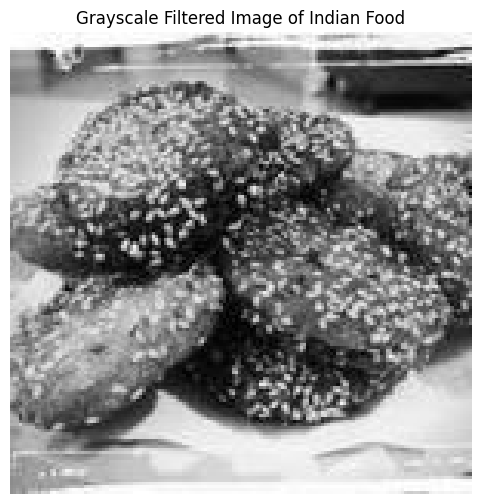

In [ ]:
# example

image_path = '/content/datasets/indian_food/grayscale/00001.jpg'

# Load the image
filtered_image = Image.open(image_path)
filtered_image_np = np.array(filtered_image)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(filtered_image_np)
plt.axis('off')  # Turn off axis labels
plt.title('Grayscale Filtered Image of Indian Food')
plt.show()


# Baseline Model
You can provide a diagram to describe the baseline model that you have tested and
how it was/will be compared with your primary neural network model. The baseline model can be a
simple machine learning model (e.g., SVM, Random Forests, Models from labs and tutorials, etc.), a
hand-coded heuristic model (that does not use machine learning), or something else. A model that
performs randomly is not acceptable. The expectations for the baseline model will vary from
project to project. You should also provide at least one quantitative and qualitative result. These
results could be learning curves, or results showing the performance of the model on selected samples
of data. The focus here is on assessing the feasibility of your model to achieve the project objectives.
◦ A reasonable choice of baseline for the problem being solved.
◦ The baseline model is easy to implement and requires minimal tuning.
◦ Visual elements are professional, concise and easy to read.
◦ The best results achieved with your model in terms of quantitative (i.e., accuracy, error, loss) and
qualitative (i.e., identify something interesting about how your model performs on select samples
or class of samples).
◦ Describe any challenges you may have faced with the task.

To compare our neural network against a simpler baseline, we will use a Support Vector Machine
(SVM) trained on manually extracted features from the images. Instead of using a deep neural net-
work for automatic feature extraction, the baseline model relies on hand-crafted features like the
Mean and Standard Deviation of RGB channels, color histograms, and texture descriptors such as
Local Binary Patterns (LBP). These features are commonly used to capture the color and texture
changes introduced by filters. The SVM will classify the filters based on these features, offering a
straightforward, interpretable alternative to our more complex neural network model. This compar-
ison will allow us to evaluate the performance gains from deep learning architectures over simpler
machine learning approaches that are less computationally intensive and easier to implement

In [ ]:
# Example usage of image processing functions
def process_image(image_path, filter_type):
    """Applies the specified filter to an image and saves the result."""
    img = np.array(Image.open(image_path))
    if filter_type == 'grayscale':
        filtered_img = apply_grayscale(img)
    elif filter_type == 'sepia':
        filtered_img = apply_sepia(img)
    elif filter_type == 'inverted':
        filtered_img = apply_inverted(img)
    else:
        print(f"Error: Invalid filter type '{filter_type}'")
        return

    output_img = Image.fromarray(filtered_img)
    # Create a unique filename for the filtered image
    base_name = os.path.basename(image_path)  # Get the original filename
    name, ext = os.path.splitext(base_name)    # Separate filename and extension
    output_path = os.path.join(os.path.dirname(image_path), f"{name}_{filter_type}{ext}")
    output_img.save(output_path)
    print(f"Saved processed image to {output_path}")


# Example usage to process a single image
image_path = '/content/datasets/indian_food/truth/00001.jpg'
process_image(image_path, 'grayscale')
process_image(image_path, 'sepia')

#Example usage to process all images in a directory
def batch_process_images(image_dir, filter_type):
  for filename in os.listdir(image_dir):
    if filename.endswith(('.jpg', '.png', '.jpeg')):  # Process only image files
      image_path = os.path.join(image_dir, filename)
      process_image(image_path, filter_type)


#Process all the 'truth' images for indian food
batch_process_images('/content/datasets/indian_food/truth', 'grayscale')

Saved processed image to /content/datasets/indian_food/truth/00001_grayscale.jpg
Saved processed image to /content/datasets/indian_food/truth/00001_sepia.jpg
Saved processed image to /content/datasets/indian_food/truth/00651_grayscale.jpg
Saved processed image to /content/datasets/indian_food/truth/02392_grayscale.jpg
Saved processed image to /content/datasets/indian_food/truth/00988_grayscale.jpg
Saved processed image to /content/datasets/indian_food/truth/02053_grayscale.jpg
Saved processed image to /content/datasets/indian_food/truth/02141_grayscale.jpg
Saved processed image to /content/datasets/indian_food/truth/02547_grayscale.jpg
Saved processed image to /content/datasets/indian_food/truth/00197_grayscale.jpg
Saved processed image to /content/datasets/indian_food/truth/02945_grayscale.jpg
Saved processed image to /content/datasets/indian_food/truth/00987_grayscale.jpg
Saved processed image to /content/datasets/indian_food/truth/01594_grayscale.jpg
Saved processed image to /conten

Number of images in training set: 9542
Number of images in test set: 2386
Test Accuracy: 0.9920368818105616
Confusion Matrix:
 [[797   0   1]
 [  1 799   0]
 [ 16   1 771]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       798
           1       1.00      1.00      1.00       800
           2       1.00      0.98      0.99       788

    accuracy                           0.99      2386
   macro avg       0.99      0.99      0.99      2386
weighted avg       0.99      0.99      0.99      2386



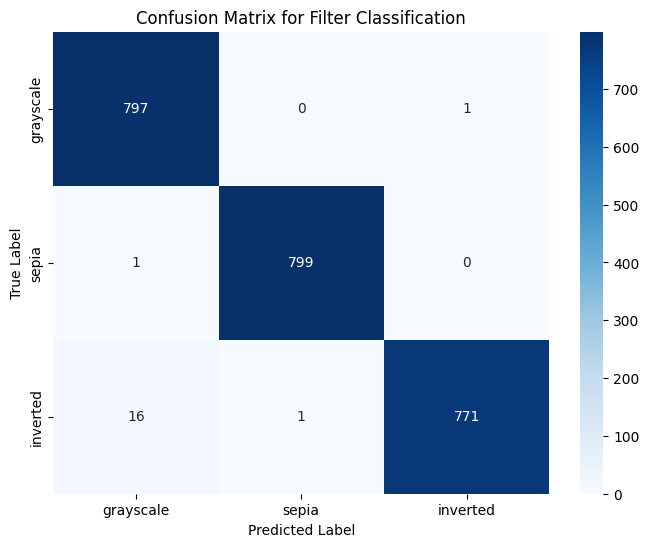

In [ ]:
# STILL WIP
# Import necessary libraries (i)
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# Define directories for filters and image types
filters = ['grayscale', 'sepia', 'inverted']
#image_types = ['indian_food', 'landscapes'] # already defined

# Generate a list of image paths and labels without loading all images, so my session DOESNT CRASHES
image_list = []
for label, filter_type in enumerate(filters):
    for image_type in image_types:
        dir_path = f"/content/datasets/{image_type}/{filter_type}/"
        for file_name in os.listdir(dir_path):
            image_list.append((os.path.join(dir_path, file_name), label)) ##add

# Split into train and test sets
train_list, test_list = train_test_split(image_list, test_size=0.2, random_state=42) ## maybe try a different split

## lets see the actual number
print(f"Number of images in training set: {len(train_list)}")
print(f"Number of images in test set: {len(test_list)}")


def load_images(image_list):
    """Load all images and labels for the given list."""
    images, labels = [], []
    for img_path, label in image_list:
        img = Image.open(img_path)
        images.append(np.array(img).flatten())
        labels.append(label)
    return np.array(images), np.array(labels)

# Load training and test data
X_train, y_train = load_images(train_list)
X_test, y_test = load_images(test_list)

# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=filters, yticklabels=filters)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Filter Classification")
plt.show()

# Primary Model

In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.datasets import DatasetFolder
from torch.utils.data import DataLoader

In [ ]:
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def normalize_label(labels):
    """
    Given a tensor containing 2 possible values, normalize this to 0/1

    Args:
        labels: a 1D tensor containing two possible scalar values
    Returns:
        A tensor normalize to 0/1 value
    """
    max_val = torch.max(labels)
    min_val = torch.min(labels)
    norm_labels = (labels - min_val)/(max_val - min_val)
    return norm_labels

def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        labels = labels.long()  # Ensure labels are of Long type for CrossEntropyLoss
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        predictions = torch.argmax(outputs, dim=1)  # Get predicted class
        total_err += (predictions != labels).sum().item()
        total_loss += loss.item()
        total_epoch += labels.size(0)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss

###############################################################################
# Training Curve
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

def get_indices(dataset):
  indices = []
  for i in range(len(dataset)):
    indices.append(i)

  return indices

def itr_merge(*itrs):
    for itr in itrs:
        for v in itr:
            yield v

def get_data_loader(target_filters, target_imgs, batch_size):
  """ Loads images of target classes and filters, splits the data into training, validation
  and testing datasets. Returns data loaders for the three preprocessed datasets.

  Args:
      target_classes: A list of strings denoting the name of the desired
                      classes. Should be a subset of the argument 'classes'
      batch_size: A int representing the number of samples per batch

  Returns:
      train_loader: iterable training dataset organized according to batch size
      val_loader: iterable validation dataset organized according to batch size
      test_loader: iterable testing dataset organized according to batch size
      classes: A list of strings denoting the name of each class
  """

  filters = ["grayscale", "sepia", "inverted"]
  np.random.seed(1000)

  ########################################################################
  # The output of torchvision datasets are PILImage images of range [0, 1].
  # We transform them to Tensors of normalized range [-1, 1].

  transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((150, 150)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
      # The original transforms.Resize code was not properly applied to the images.
      # The current format ensures it is applied to all images during dataset creation.





  # just do the whole loop for each of the 3-6 folders (1-2 * 3)

  for i, data_type in enumerate(target_imgs):
    #for j, filter in enumerate(target_filters):
      #path = f"/content/datasets/{data_type}/{filter}/"
      path = f"/content/datasets/{data_type}/"
      print(f"Currently loading data from {path}")

      curr_data = ImageFolder(path, transform=transform)
      curr_indices = get_indices(curr_data)

      split = int(len(curr_indices) * 0.7) # split at 80%
      val_test_split = int(len(curr_indices) * 0.85)

      train_indices, val_indices, test_indices = curr_indices[:split], curr_indices[split:val_test_split], curr_indices[val_test_split:]

      #if (i+j==0): # first iteration, create loaders
      if (i == 0):
        curr_train_sampler = SubsetRandomSampler(train_indices)
        curr_train_loader = DataLoader(curr_data, batch_size=batch_size,
                                                  num_workers=1,
                                                  #sampler=curr_train_sampler,
                                                  shuffle=True)
        curr_val_sampler = SubsetRandomSampler(val_indices)
        curr_val_loader = DataLoader(curr_data, batch_size=batch_size,
                                                  num_workers=1,
                                                  #sampler=curr_val_sampler,
                                                  shuffle=True)
        curr_test_sampler = SubsetRandomSampler(test_indices)
        curr_test_loader = DataLoader(curr_data, batch_size=batch_size,
                                                  num_workers=1,
                                                  #sampler=curr_test_sampler,
                                                  shuffle=True)

        train_loader = curr_train_loader
        val_loader = curr_val_loader
        test_loader = curr_test_loader

      else: # loader already exists, concatenate to end of existing loader

        temp_train_sampler = SubsetRandomSampler(train_indices)
        temp_train_loader = DataLoader(curr_data, batch_size=batch_size,
                                                  num_workers=1,
                                                  #sampler=temp_train_sampler,
                                                  shuffle=True)
        temp_val_sampler = SubsetRandomSampler(val_indices)
        temp_val_loader = DataLoader(curr_data, batch_size=batch_size,
                                                  num_workers=1,
                                                  #sampler=temp_val_sampler,
                                                  shuffle=True)
        temp_test_sampler = SubsetRandomSampler(test_indices)
        temp_test_loader = DataLoader(curr_data, batch_size=batch_size,
                                                  num_workers=1,
                                                  #sampler=temp_test_sampler,
                                                  shuffle=True)

        # we know that all three filters folders have the same amount of examples since we generated this ourselves. Each image appears once in truth, greyscale, sepia, and inverted
        # thus we don't need to worry about distribution - having the entirety of each filter folder in the data loader ends up creating equal 1/3rd distributions of each filter in the total dataset
        # furthermore, by shuffling after, images that are used in each of training, val, and test, are not seen in the other two as a different filtered image. Order of image names in each folder matches the others.
        # i.e. img X, appearing in greyscale training data, will appear as sepia img X in training and inverted img X in training. But no filtered version of img X will appear in any of the val or test datasets
        train_loader = itr_merge(curr_train_loader, temp_train_loader)
        val_loader = itr_merge(curr_val_loader, temp_val_loader)
        test_loader = itr_merge(curr_test_loader, temp_test_loader)

        curr_train_loader = train_loader
        curr_val_loader = val_loader
        curr_test_loader = test_loader

  # currently, train_loader order is:
  # food gray, food sepia, food invert, landscape gray, ...

  # dataloader will get shuffled upon creation of it's iterator

  return train_loader, val_loader, test_loader, filters


In [ ]:
target_filters = ["grayscale", "sepia", "inverted"]
target_imgs = ["indian_food"]

check_train_loader, check_val_loader, check_test_loader, check_filters = get_data_loader(target_filters, target_imgs, batch_size=1)

l_test_images = []
i = 0
for image, label in check_train_loader:
  if (i > 9):
    break
  else:
    sample_image = image[0]
    np_sample = sample_image.numpy().transpose(1, 2, 0)
    l_test_images.append(np_sample)
  i += 1


Currently loading data from /content/datasets/indian_food/


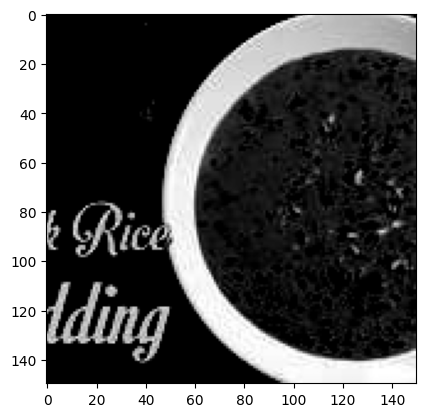

In [ ]:
plt.imshow(l_test_images[3])

# going through and displaying the list appears that the shuffling was done correctly - all three of grayscale, sepia, and inverted show up randomly in the first ten of the dataloader

In [ ]:
# model architecture and training

###OK IMPORTANT DONT RUN THIS!!!

### basically the most important part of our model lol

class PrimaryNet(nn.Module):
    def __init__(self):
        super(PrimaryNet, self).__init__()
        self.name = "primary"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 5 * 5, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

def train_net(net, target_data, target_filters, batch_size=64, learning_rate=0.003, num_epochs=30):

    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    train_loader, val_loader, test_loader, filters = get_data_loader(target_filters, target_data, batch_size=batch_size)
    ########################################################################
    # Define the Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    #optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            labels = normalize_label(labels) # Convert labels to 0/1
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            corr = (outputs > 0.0).squeeze().long() != labels
            total_train_err += int(corr.sum())
            total_train_loss += loss.item()
            total_epoch += len(labels)
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
        print(("Epoch {}: Train err: {}, Train loss: {} |"+
               "Validation err: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_err[epoch],
                   train_loss[epoch],
                   val_err[epoch],
                   val_loss[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

In [ ]:
# dylan testing
# Model architecture and training
class PrimaryNet(nn.Module):
    def __init__(self):
        super(PrimaryNet, self).__init__()
        self.name = "primary"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)

        # Adjust fc1 input size to match the flattened conv2 output
        self.fc1 = nn.Linear(10 * 34 * 34, 32)
        self.fc2 = nn.Linear(32, 4)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train_net(net, target_data, target_filters, batch_size=64, learning_rate=0.003, num_epochs=30):
    torch.manual_seed(1000)
    train_loader, val_loader, test_loader, filters = get_data_loader(target_filters, target_data, batch_size=batch_size)

    # Define the Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)

    start_time = time.time()

    # Training loop
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data

            # Check and convert labels to Long if needed
            labels = labels.long()  # Explicitly cast labels to Long
            print(f"Epoch {epoch}, Batch {i} - Labels dtype: {labels.dtype}, Unique values: {torch.unique(labels)}")  # Debugging output

            # Zero the parameter gradients
            optimizer.zero_grad()
            outputs = net(inputs)

            # Compute loss and ensure labels are in the correct format
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Calculate error
            predictions = torch.argmax(outputs, dim=1)
            total_train_err += (predictions != labels).sum().item()
            total_train_loss += loss.item()
            total_epoch += labels.size(0)

        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)

        print(f"Epoch {epoch + 1}: Train err: {train_err[epoch]}, Train loss: {train_loss[epoch]} | Validation err: {val_err[epoch]}, Validation loss: {val_loss[epoch]}")

        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)

    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)


In [ ]:
# For quantitative observations, we can plot the training curve
primary = PrimaryNet()

target_filters = ["grayscale", "sepia", "inverted"]
target_data = ["indian_food"]
train_net(primary, target_filters=target_filters, target_data=target_data, batch_size=64, learning_rate=0.003, num_epochs=20)

model_path = get_model_name("primary", batch_size=64, learning_rate=0.003, epoch=None)
plot_training_curve(model_path)

train_loader, val_loader, test_loader, classes = get_data_loader(target_filters, target_data, batch_size=64)
# Evaluate on test set
test_err, test_loss = evaluate(primary, test_loader, nn.CrossEntropyLoss())
test_accuracy = 1 - test_err  # Accuracy is the inverse of error
print("Test Error:", test_err)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# for qualitative observations, we can display some test images along with their predicted and actual labels
import random

def show_predictions(net, loader, classes, num_samples=5):
    """Show predictions on random samples from the test set."""
    net.eval()  # Set model to evaluation mode
    samples = random.sample(list(loader), num_samples)

    plt.figure(figsize=(15, 5))
    for i, data in enumerate(samples):
        inputs, labels = data
        outputs = net(inputs)
        predictions = (outputs > 0).squeeze().long()  # Threshold to get binary predictions

        img = inputs[0].permute(1, 2, 0).numpy()  # Convert tensor to image
        plt.subplot(1, num_samples, i+1)
        plt.imshow((img * 0.5 + 0.5).clip(0, 1))  # Denormalize and display
        plt.title(f"True: {classes[labels.item()]}\nPred: {classes[predictions.item()]}")
        plt.axis("off")
    plt.show()

# call this function to visualize predictions
show_predictions(primary, test_loader, classes)


Streaming output truncated to the last 5000 lines.
Epoch 13, Batch 49 - Labels dtype: torch.int64, Unique values: tensor([0, 1, 2, 3])
Epoch 13, Batch 50 - Labels dtype: torch.int64, Unique values: tensor([0, 1, 2, 3])
Epoch 13, Batch 51 - Labels dtype: torch.int64, Unique values: tensor([0, 1, 2, 3])
Epoch 13, Batch 52 - Labels dtype: torch.int64, Unique values: tensor([0, 1, 2, 3])
Epoch 13, Batch 53 - Labels dtype: torch.int64, Unique values: tensor([0, 1, 2, 3])
Epoch 13, Batch 54 - Labels dtype: torch.int64, Unique values: tensor([0, 1, 2, 3])
Epoch 13, Batch 55 - Labels dtype: torch.int64, Unique values: tensor([0, 1, 2, 3])
Epoch 13, Batch 56 - Labels dtype: torch.int64, Unique values: tensor([0, 1, 2, 3])
Epoch 13, Batch 57 - Labels dtype: torch.int64, Unique values: tensor([0, 1, 2, 3])
Epoch 13, Batch 58 - Labels dtype: torch.int64, Unique values: tensor([0, 1, 2, 3])
Epoch 13, Batch 59 - Labels dtype: torch.int64, Unique values: tensor([0, 1, 2, 3])
Epoch 13, Batch 60 - Labe

FileNotFoundError: model_primary_bs64_lr0.003_epochNone_train_err.csv not found.

# Regression

For regression, need new way of calculating loss. Model will guess the 9 RGB coefficents and 3 RGB biases. Loss calculated from this.

In [ ]:
import math

def get_truth_abcd(filter):
  # returns a, b, c, and d for each of the three channels
  # where new_channel = a*old_red + b*old_green + c*old_blue + d
  # ["grayscale", "sepia", "inverted"]

  # abcd = [ [red_a, red_b, red_c, red_d],
  #          [green_a, green_b, green_c, green_d],
  #          [blue_a, blue_b, blue_c, blue_d]]

  abcd = []
  if filter == 'grayscale':
    abcd.append([0.299, 0.587, 0.114, 0.0]) # red
    abcd.append([0.299, 0.587, 0.114, 0.0]) # green
    abcd.append([0.299, 0.587, 0.114, 0.0]) # blue

  elif filter == 'sepia':
    abcd.append([0.393, 0.769, 0.189, 0.0]) # red
    abcd.append([0.349, 0.686, 0.168, 0.0]) # green
    abcd.append([0.272, 0.534, 0.131, 0.0]) # blue
    # there is a clipping operation where you need to take
    # min(255, new_channel) to avoid new rgb values > 255
    # but we will not model this so technically sepia is nonlinear

  elif filter == 'inverted':
    abcd.append([-1.0, 0.0, 0.0, 255.0]) # red
    abcd.append([0.0, -1.0, 0.0, 255.0]) # green
    abcd.append([0.0, 0.0, -1.0, 255.0]) # blue

  return abcd

def rmse(pred_abcd, true_abcd):

  rmse = 0.0
  for i in range(len(true_abcd)):
    for j in range(len(pred_abcd[0])):
      rmse += (pred_abcd[i][j] - true_abcd[i][j])**2

  rmse = rmse/12
  rmse = math.sqrt(rmse)

  return rmse

'''
e.g.
pred_abcd = model(img_x) # this spits out 12 real outputs now rather than a single neuron output

true_abcd = get_truth_abcd(img_x.label) # img_x.label would be string 'grayscale' or whatever

error = rmse(pred_abcd, true_abcd)

'''